# Retail Sales and Customer Shopping Trends

### Introduction

This project focuses on analyzing Retail Sales and Customer Shopping Trends to uncover key insights from the sales data. The objective is to explore various factors influencing sales, including product categories, customer demographics, purchase behavior, and seasonal trends. By performing in-depth data analysis, the goal is to identify patterns that can guide business strategies, such as optimizing product offerings and improving overall sales performance. Through this project, I aim to provide actionable recommendations that will drive business growth to enhance customer satisfaction, and boost sales and profitability.

### Questions
* What are the top-performing products and categories, and how do customer demographics (age, gender, and location) influence their sales performance?
* How do sales fluctuate throughout 2023, and are there specific months, seasons, or holidays when customers shop more?
* How do promotions and discounts impact sales across different categories, and do they encourage higher spending or more frequent purchases?
* How do customer behaviors—such as purchase frequency, previous purchases, subscription status, and review ratings—impact overall sales?

The datasets were taken from the website Kaggle.com

### Results

Before beginning we need to import the necessary libraries.

In [301]:
from platform import python_version
print(python_version())

3.12.4


In [302]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the os module to perform operating system related tasks
import os

# Import the numpy library for numerical operations
import numpy as np

# Import the matplotlib library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

# Import the seaborn library for making statistical graphics, built on top of matplotlib
import seaborn as sns

# Import the sqlite3 module to work with SQLite databases
import sqlite3

# Import datetime module to work with datetime-related functions
from datetime import datetime

### Data Preprocessing and Cleaning
Data loading

In [303]:
# Read the CSV files from the 'data' folder
customer_df1 = pd.read_csv("../data/Customer_Shopping_Trends.csv")
retail_df2 = pd.read_csv("../data/Retail_Sales.csv")

To protect the data I will be working with copies of each csv.

In [304]:
customer_df = customer_df1.copy()
retail_df = retail_df2.copy()

### Inspect The Data
Explore the data to understand its structure

In [305]:
# Display the first 5 rows of the DataFrame
customer_df.head(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [306]:
# Display the last 5 rows of the DataFrame
customer_df.tail(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly
3899,3900,52,Female,Handbag,Accessories,81,California,M,Beige,Spring,3.1,No,Store Pickup,No,No,33,Venmo,Quarterly


In [307]:
customer_df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [308]:
# Check if the DataFrame has null values, duplicates, or any issues.
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [309]:
# Display the first 5 rows of the DataFrame
retail_df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [310]:
# Display the last 5 rows of the DataFrame
retail_df.tail(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [311]:
retail_df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [312]:
# Check if the DataFrame has null values, duplicates, or any issues.
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


Since the datasets are clean. Now I will introduce NaN values, duplicates, and whitespaces into the datasets
to simulate real-world data issues and practice data cleaning techniques.


In [ ]:
# Add NaN values to the 'Shipping Type' column in customer_df
customer_df.loc[3:4, 'Shipping Type'] = np.nan
# Duplicate the first row of the customer_df
customer_df = pd.concat([customer_df, customer_df.iloc[[0]]], ignore_index=True)
# Add whitespace to the 'Payment Method' column in customer_df
customer_df.loc[1:2, 'Payment Method'] = '   '
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,NaN,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,NaN,Yes,Yes,31,PayPal,Annually


In [ ]:
# Add NaN values to the 'Age' column in retail_df
retail_df.loc[2:4, 'Age'] = np.nan
# Duplicate the first row of the retail_df
retail_df = pd.concat([retail_df, retail_df.iloc[[0]]], ignore_index=True)
# Add whitespace to the 'Product Category' column in retail_df
retail_df.loc[3, 'Product Category'] = '   '  
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,NaN,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,NaN,,1,500,500
4,5,2023-05-06,CUST005,Male,NaN,Beauty,2,50,100


### Data Cleaning 
Check for missing values, duplicates and any issues in the datasets.

In [315]:
# Check for missing values in customer_df
customer_df.isna()
# Check for duplicate rows
duplicates = customer_df.duplicated()
# Check if each cell contains only whitespace
only_whitespace = customer_df.apply(lambda x: isinstance(x, str) and x.isspace())
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,NaN,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,NaN,Yes,Yes,31,PayPal,Annually


In [316]:
# Check for missing values in retail_df
retail_df.isna()
# Check for duplicate rows
duplicates = retail_df.duplicated()
# Check if each cell contains only whitespace
only_whitespace = retail_df.apply(lambda x: isinstance(x, str) and x.isspace())
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,NaN,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,NaN,,1,500,500
4,5,2023-05-06,CUST005,Male,NaN,Beauty,2,50,100


I'm going to handdle missing values, dropping dupliceted rows and stripping whitespace from both datasets

In [317]:
# Fill missing values for string columns (object type) with 'Unknown'
customer_df[customer_df.select_dtypes(include='object').columns] = customer_df.select_dtypes(include='object').fillna('Unknown')
# Drop duplicated rows
customer_df.drop_duplicates(inplace=True)
# Strip whitespace from 'Payment Method' column and replace empty strings with "Unknown"
customer_df['Payment Method'] = customer_df['Payment Method'].str.strip()  # Strips whitespace
customer_df['Payment Method'] = customer_df['Payment Method'].replace(r'^\s*$', 'Unknown', regex=True)
customer_df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Unknown,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Unknown,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Unknown,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Unknown,Yes,Yes,31,PayPal,Annually


In [318]:
# Fill missing values for numeric columns with the median
retail_df[retail_df.select_dtypes(include='number').columns] = retail_df.select_dtypes(include='number').apply(lambda x: x.fillna(x.median()))
# Drop duplicated rows
retail_df.drop_duplicates(inplace=True)
# Strip whitespace from 'Product Category' column and replace empty strings with "Unknown"
retail_df['Product Category'] = retail_df['Product Category'].str.strip()  # Strips whitespace
retail_df['Product Category'] = retail_df['Product Category'].replace(r'^\s*$', 'Unknown', regex=True)
retail_df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34.0,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26.0,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,42.0,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,42.0,Unknown,1,500,500
4,5,2023-05-06,CUST005,Male,42.0,Beauty,2,50,100


### Data Preparation for Merging

Create 'Sales' column for clarity, and renaming 'Item Purchased' column as 'Product'

In [319]:
# Calculate 'Sales' as the product of 'Purchase Amount (USD)' and 'Quantity' columns
retail_df['Sales'] = customer_df['Purchase Amount (USD)'] * retail_df['Quantity'] # I will keep 'Quantity' from retail_df to calculate 'Sales' and Purchase Amount (USD)
# Recalculate 'Quantity' by dividing 'Sales' by 'Purchase Amount (USD)' and round to the nearest whole number
retail_df['Quantity'] = (retail_df['Sales'] / customer_df['Purchase Amount (USD)']).round()
# Rename 'Item Purchased' column to 'Product' in customer_df for better readability
customer_df.rename(columns={'Item Purchased': 'Product'}, inplace=True)

Before merging I will format the 'Customer ID' in customer-df, then I will remove the 'CUST' prefix to make 'Customer ID' as an integer.
And I will drop unecessary columns from both datasets.

In [320]:
# Format Customer IDs in customer_df
customer_df['Customer ID'] = 'CUST' + customer_df['Customer ID'].astype(str).str.zfill(3)
# Convert 'Customer ID' to string type in both DataFrames
customer_df['Customer ID'] = customer_df['Customer ID'].astype(str)
retail_df['Customer ID'] = retail_df['Customer ID'].astype(str)
# Remove the 'CUST' prefix from the 'Customer ID' column and convert it to integer to retain only numeric values 
# This allows us to organize the IDs as integers, ensuring a clean, sequential index.
customer_df['Customer ID'] = customer_df['Customer ID'].str.replace('CUST', '').astype(int)
retail_df['Customer ID'] = retail_df['Customer ID'].str.replace('CUST', '').astype(int)

# Lists of columns to drop from customer_df
customer_columns_to_drop = ['Size', 'Color', 'Shipping Type', 'Payment Method']
customer_df.drop(columns=customer_columns_to_drop, axis=1, inplace=True)

# Columns to drop from retail_df
retail_columns_to_drop = ['Age', 'Gender', 'Transaction ID', 'Product Category', 'Total Amount', 'Price per Unit']
retail_df.drop(columns=retail_columns_to_drop, axis=1, inplace=True)

### Merge the two datasets customer_df and retail_df using outer join on the common key column 'Customer ID'

In [321]:
# Merge datasets using outer join on 'Customer ID'
merged_df = pd.merge(customer_df, retail_df, on=['Customer ID'], how='outer', suffixes=('_customer', '_retail'))
# Sort by 'Customer ID' to ensure they are organized in ascending order
merged_df.sort_values(by='Customer ID', inplace=True)
# Reset the index to have a clean index that aligns with sorted 'Customer ID'
merged_df.reset_index(drop=True, inplace=True)
# Display the first 5 rows of the merged_df
merged_df.head()

,Customer ID,Age,Gender,Product,Category,Purchase Amount (USD),Location,Season,Review Rating,Subscription Status,Discount Applied,Promo Code Used,Previous Purchases,Frequency of Purchases,Date,Quantity,Sales
0,1,55,Male,Blouse,Clothing,53,Kentucky,Winter,3.1,Yes,Yes,Yes,14,Fortnightly,2023-11-24,3.0,159.0
1,2,19,Male,Sweater,Clothing,64,Maine,Winter,3.1,Yes,Yes,Yes,2,Fortnightly,2023-02-27,2.0,128.0
2,3,50,Male,Jeans,Clothing,73,Massachusetts,Spring,3.1,Yes,Yes,Yes,23,Weekly,2023-01-13,1.0,73.0
3,4,21,Male,Sandals,Footwear,90,Rhode Island,Spring,3.5,Yes,Yes,Yes,49,Weekly,2023-05-21,1.0,90.0
4,5,45,Male,Blouse,Clothing,49,Oregon,Spring,2.7,Yes,Yes,Yes,31,Annually,2023-05-06,2.0,98.0


In [322]:
# Display the dimensions (number of rows and columns) of the merged_df
merged_df.shape

(3900, 17)

Add a new 'Holiday' column to merged_df by creating a holiday DataFrame and merging it with merged_df based on the 'Date' column.

In [323]:
# Create a dictionary of holidays with dates
holidays_2023 = {
    datetime(2023, 1, 1): "New Year's Day",
    datetime(2023, 2, 14): "Valentine's Day",
    datetime(2023, 4, 9): "Easter Sunday",
    datetime(2023, 5, 14): "Mother's Day",
    datetime(2023, 6, 18): "Father's Day",
    datetime(2023, 7, 4): "Independence Day",
    datetime(2023, 10, 31): "Halloween",
    datetime(2023, 11, 23): "Thanksgiving",
    datetime(2023, 11, 24): "Black Friday",
    datetime(2023, 11, 27): "Cyber Monday",
    datetime(2023, 12, 24): "Christmas Eve",
    datetime(2023, 12, 25): "Christmas Day",
    datetime(2023, 12, 31): "New Year's Eve"
}

# Converte dictionary to DataFrame
holidays_df = pd.DataFrame(list(holidays_2023.items()), columns=['Date', 'Holiday'])

# Ensure both 'Date' columns are in datetime format
holidays_df['Date'] = pd.to_datetime(holidays_df['Date'], errors='coerce')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], errors='coerce')

# Merge the merged_df with holidays_df on 'Date' to add 'Holiday' column
merged_df = merged_df.merge(holidays_df, on='Date', how='left')
merged_df['Holiday'] = merged_df['Holiday'].fillna('No Holiday')

Reorder the columns of merged_df to enhance readability and organization.

In [324]:
# Reorder the columns for merged_df
merged_df = merged_df[['Customer ID', 'Age', 'Gender', 'Product','Category',
                            'Location', 'Season', 'Review Rating', 'Subscription Status',
                            'Discount Applied', 'Promo Code Used', 'Previous Purchases', 
                            'Frequency of Purchases','Date', 'Quantity',
                            'Purchase Amount (USD)', 'Sales', 'Holiday']]
merged_df.columns

Index(['Customer ID', 'Age', 'Gender', 'Product', 'Category', 'Location',
       'Season', 'Review Rating', 'Subscription Status', 'Discount Applied',
       'Promo Code Used', 'Previous Purchases', 'Frequency of Purchases',
       'Date', 'Quantity', 'Purchase Amount (USD)', 'Sales', 'Holiday'],
      dtype='object')

I'am going to resolve missing values after merge

In [325]:
# Fill missing values for string columns (object type) with 'Unknown'
merged_df.loc[:, merged_df.select_dtypes(include='object').columns] = merged_df.select_dtypes(include='object').fillna('Unknown')
# Fill missing values for numeric columns with the median
merged_df.loc[:, merged_df.select_dtypes(include='number').columns] = merged_df.select_dtypes(include='number').apply(lambda x: x.fillna(x.median()))
# Set a default date for missing values in the 'Date' column
merged_df['Date'] = merged_df['Date'].fillna(pd.Timestamp('2024-01-01'))
# Sort the DataFrame by 'Date' in ascending order
merged_df = merged_df.sort_values(by='Date', ascending=True)
# Check for null values
merged_df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Product                   0
Category                  0
Location                  0
Season                    0
Review Rating             0
Subscription Status       0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Frequency of Purchases    0
Date                      0
Quantity                  0
Purchase Amount (USD)     0
Sales                     0
Holiday                   0
dtype: int64

There are no null values

### Data Preparation for Analysis

Data Formatting

In [326]:
# Check the data type of the columns in the merged_df
merged_df.dtypes

Customer ID                        int64
Age                                int64
Gender                            object
Product                           object
Category                          object
Location                          object
Season                            object
Review Rating                    float64
Subscription Status               object
Discount Applied                  object
Promo Code Used                   object
Previous Purchases                 int64
Frequency of Purchases            object
Date                      datetime64[ns]
Quantity                         float64
Purchase Amount (USD)              int64
Sales                            float64
Holiday                           object
dtype: object

In [327]:
# Convert columns from merged_df to appropriate types
# Convert selected columns to 'category'
categorical_columns = ['Gender', 'Product', 'Category', 'Location', 'Holiday']
for col in categorical_columns:
    merged_df[col] = merged_df[col].astype('category')

# Convert the 'Date' column to datetime format    
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Convert 'Quantity', 'Previous Purchases', and 'Age' to integers
merged_df['Quantity'] = pd.to_numeric(merged_df['Quantity']).fillna(0).astype(int)
merged_df['Previous Purchases'] = pd.to_numeric(merged_df['Previous Purchases']).fillna(0).astype(int)
merged_df['Age'] = pd.to_numeric(merged_df['Age']).fillna(0).astype(int)

# Convert Yes/No columns to boolean
yes_no_columns = ['Subscription Status', 'Discount Applied', 'Promo Code Used']
for col in yes_no_columns:
    merged_df[col] = merged_df[col].map({'Yes': True, 'No': False}).astype(bool)
merged_df.dtypes

Customer ID                        int64
Age                                int64
Gender                          category
Product                         category
Category                        category
Location                        category
Season                            object
Review Rating                    float64
Subscription Status                 bool
Discount Applied                    bool
Promo Code Used                     bool
Previous Purchases                 int64
Frequency of Purchases            object
Date                      datetime64[ns]
Quantity                           int64
Purchase Amount (USD)              int64
Sales                            float64
Holiday                         category
dtype: object

In [328]:
# Extract year, month, and day into new columns
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Day'] = merged_df['Date'].dt.day

# Categorize "Age" into groups for clearer demographic insights
# Define age bins and labels
bins = [0, 18, 35, 50, 65, float('inf')]
labels = ["Child", "Young Adult", "Adult", "Senior", "Elderly"]
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=bins, labels=labels)

# Define bins and labels for categorizing "Previous Purchases" into groups
bins = [0, 10, 20, 30, 40, 50, merged_df['Previous Purchases'].max() + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']  # Adjusted labels
# Create 'Previous Purchases Group' column
merged_df['Previous Purchases Group'] = pd.cut(merged_df['Previous Purchases'], bins=bins, labels=labels, right=False)

In [329]:
# Define the path to save the merged_df as a CSV file
data_folder_path = '../data'
# Sort the DataFrame by 'Customer ID'
merged_df = merged_df.sort_values(by=['Customer ID'], ascending=True)

# Reset the index
merged_df.reset_index(drop=True, inplace=True)

# Save the merged DataFrame to a CSV file in the specified folder
merged_df.to_csv(os.path.join(data_folder_path, 'merged_data.csv'))
merged_df.head(5)

,Customer ID,Age,Gender,Product,Category,Location,Season,Review Rating,Subscription Status,Discount Applied,...,Date,Quantity,Purchase Amount (USD),Sales,Holiday,Year,Month,Day,Age Group,Previous Purchases Group
0,1,55,Male,Blouse,Clothing,Kentucky,Winter,3.1,True,True,...,2023-11-24,3,53,159.0,Black Friday,2023,11,24,Senior,11-20
1,2,19,Male,Sweater,Clothing,Maine,Winter,3.1,True,True,...,2023-02-27,2,64,128.0,No Holiday,2023,2,27,Young Adult,0-10
2,3,50,Male,Jeans,Clothing,Massachusetts,Spring,3.1,True,True,...,2023-01-13,1,73,73.0,No Holiday,2023,1,13,Adult,21-30
3,4,21,Male,Sandals,Footwear,Rhode Island,Spring,3.5,True,True,...,2023-05-21,1,90,90.0,No Holiday,2023,5,21,Young Adult,41-50
4,5,45,Male,Blouse,Clothing,Oregon,Spring,2.7,True,True,...,2023-05-06,2,49,98.0,No Holiday,2023,5,6,Adult,31-40


### Exploratory Data Analysis (EDA)

In [330]:
# General Overview of the merged_df
merged_df.describe()

,Customer ID,Age,Review Rating,Previous Purchases,Date,Quantity,Purchase Amount (USD),Sales,Year,Month,Day
count,3900.000000,3900.000000,3900.000000,3900.000000,3900,3900.000000,3900.000000,3900.00000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,3.749949,25.351538,2023-11-15 08:06:38.769230592,2.875385,59.764359,133.67641,2023.744103,2.422821,4.669231
min,1.000000,18.000000,2.500000,1.000000,2023-01-01 00:00:00,1.000000,20.000000,20.00000,2023.000000,1.000000,1.000000
25%,975.750000,31.000000,3.100000,13.000000,2023-12-23 00:00:00,3.000000,39.000000,128.00000,2023.000000,1.000000,1.000000
50%,1950.500000,44.000000,3.700000,25.000000,2024-01-01 00:00:00,3.000000,60.000000,128.00000,2024.000000,1.000000,1.000000
75%,2925.250000,57.000000,4.400000,38.000000,2024-01-01 00:00:00,3.000000,81.000000,128.00000,2024.000000,1.000000,1.000000
max,3900.000000,70.000000,5.000000,50.000000,2024-01-01 00:00:00,4.000000,100.000000,400.00000,2024.000000,12.000000,31.000000
std,1125.977353,15.207589,0.716223,14.447125,NaN,0.611390,23.685392,48.24613,0.436420,2.987783,7.695429


### Calculate a General Sales Overview to understand the data

In [331]:
# Calculate the Total Sales
total_sales = merged_df['Sales'].sum()
# Calculate the Average Sales Per Customer
avg_sales_per_customer = merged_df.groupby('Customer ID', observed=False)['Sales'].mean()
# Sort the Average Sales Per Customer in descending order
avg_sales_per_customer_sorted = avg_sales_per_customer.sort_values(ascending=False)
# Calculate the Average Sales Per Purchase (transaction) and Quantity
avg_sales_per_purchase = merged_df['Sales'].mean()
avg_sales_per_quantity = (merged_df['Sales'] / merged_df['Quantity']).mean()
# Output the results
print("Total Sales:", total_sales)
print("Average Sales Per Customer:", avg_sales_per_customer)
print("Average Sales Per Purchase:", avg_sales_per_purchase)
print("Average Sales Per Quantity:", avg_sales_per_quantity)

Total Sales: 521338.0
Average Sales Per Customer: Customer ID
1       159.0
2       128.0
3        73.0
4        90.0
5        98.0
        ...  
3896    128.0
3897    128.0
3898    128.0
3899    128.0
3900    128.0
Name: Sales, Length: 3900, dtype: float64
Average Sales Per Purchase: 133.67641025641026
Average Sales Per Quantity: 47.022136752136745


### Analyze the top-selling products/categories by examining average sales across different customer demographics (age, gender and location).

Define a function that creates a DataFrame specifically for top-performing products and categories as well as customer demographic groups

In [332]:
# Define a function that creates DataFrames for top-performing products, categories, and customer demographic groups.
def top_performers_by_sales(merged_df):
# Select relevant columns for analysis
    data = merged_df[['Product', 'Category', 'Sales', 'Age Group', 'Gender', 'Location']]
    
# Calculate Average Sales per Product and Category
    product_category_sales = data.groupby(['Product', 'Category'], observed=True)['Sales'].mean().reset_index()
    product_category_sales.columns = ['Product', 'Category', 'Average Sales']
# Sort the values by the average sales    
    product_category_sales = product_category_sales.sort_values(by='Average Sales', ascending=False)
    
# Calculate Average Sales by Gender and Age Group
    gender_age_sales = data.groupby(['Gender', 'Age Group'], observed=True)['Sales'].mean().reset_index()
    gender_age_sales.columns = ['Gender', 'Age Group', 'Average Sales']
# Sort the values by the average sales    
    gender_age_sales = gender_age_sales.sort_values(by='Average Sales', ascending=False)
    
# Calculate Average Sales by Category and Location
    location_category_sales = data.groupby(['Location', "Category"], observed=True)['Sales'].mean().reset_index()
    location_category_sales.columns = ["Location", "Category", "Average Sales"]
    location_category_sales = location_category_sales.sort_values(by='Average Sales', ascending=False)
    
# Return all the DataFrames
    return product_category_sales, gender_age_sales, location_category_sales
# Apply the function
product_category_sales, gender_age_sales, location_category_sales = top_performers_by_sales(merged_df)

### I will visualize the Results 

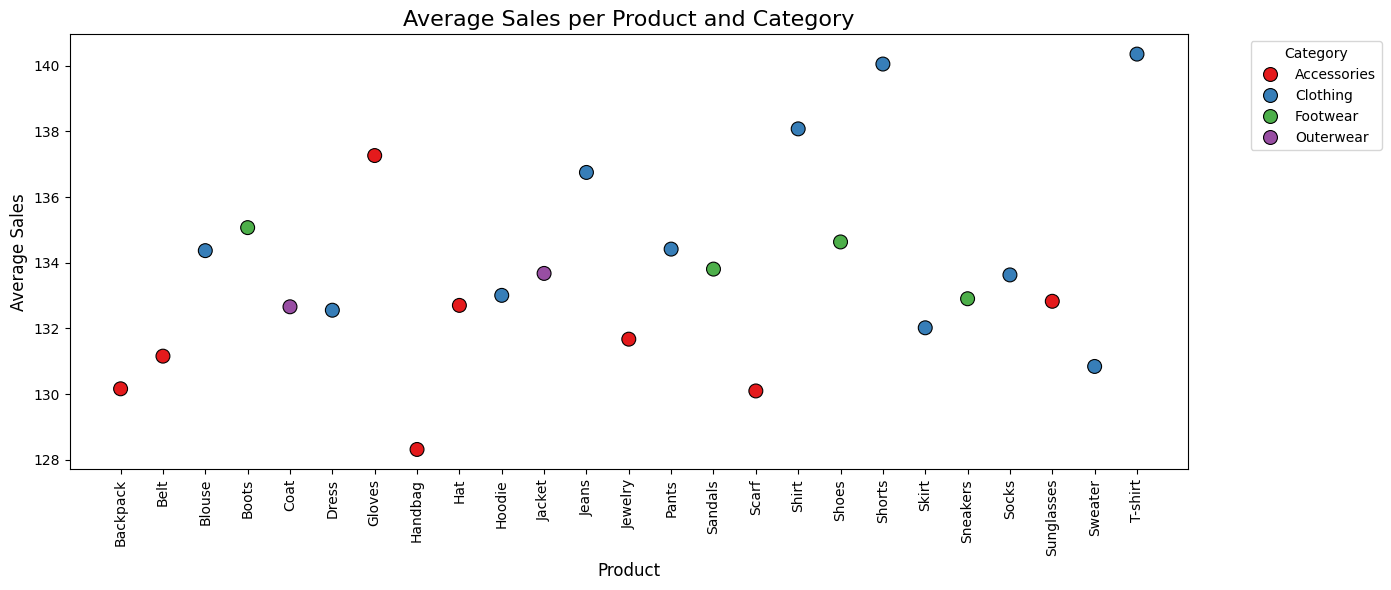

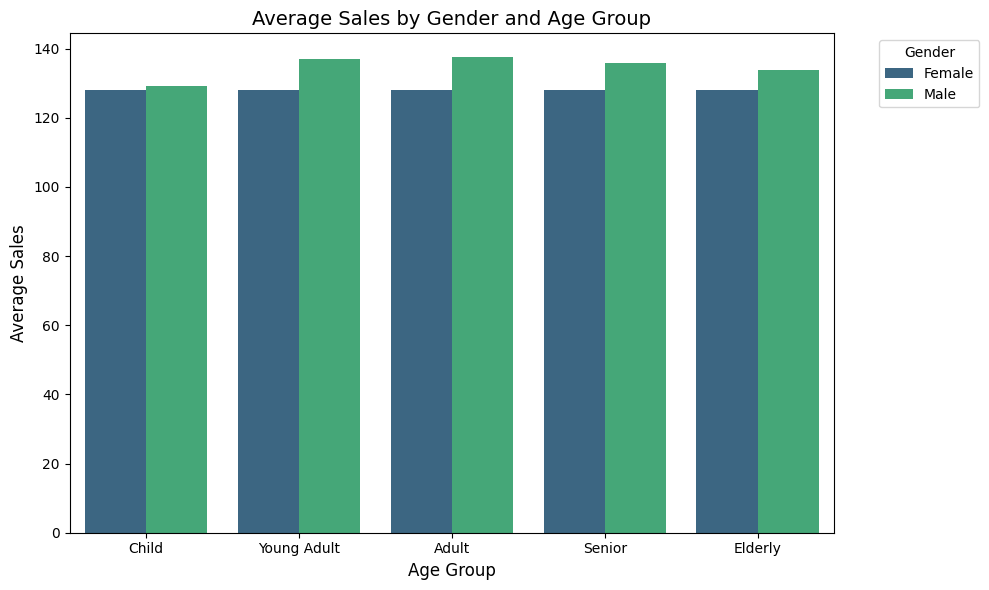

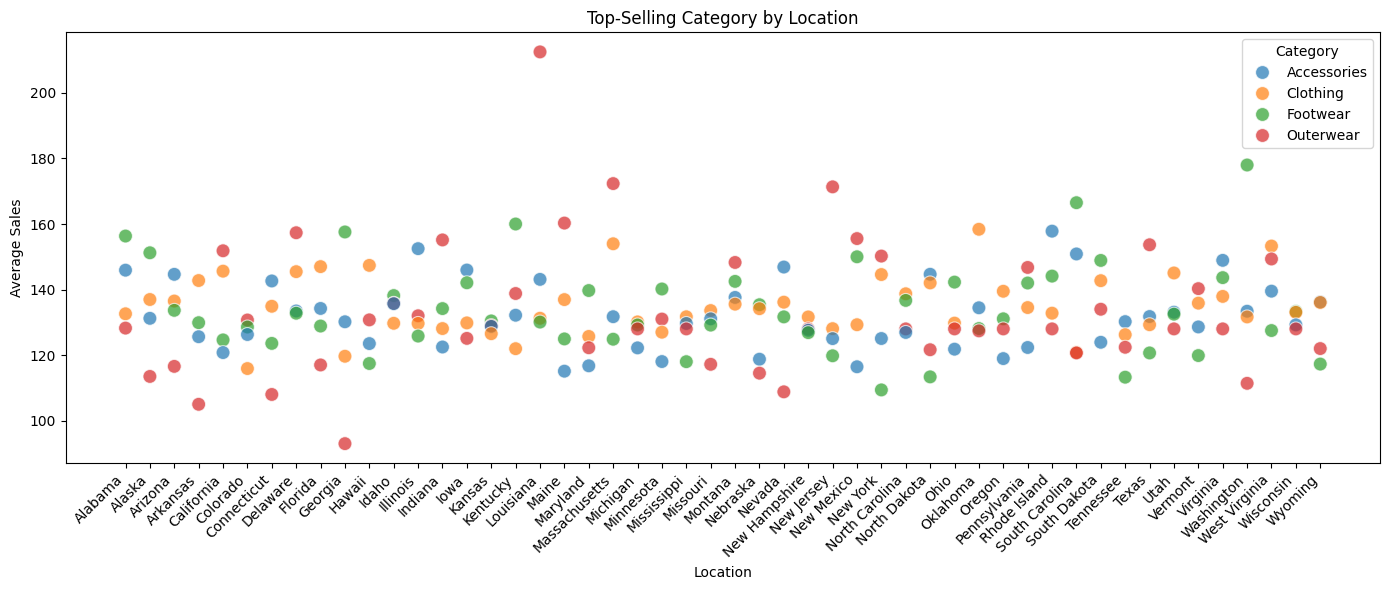

In [333]:
# Create a Scatter Plot from Seaborn to show the average sales by product and category
plt.figure(figsize=(14, 6))
sns.scatterplot(data=product_category_sales, x='Product', y='Average Sales', hue='Category', palette='Set1', s=100, edgecolor='black')
# Add Titles and Labels
plt.title('Average Sales per Product and Category', fontsize=16)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels to fit product names
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
# Update layout and display the plot
plt.tight_layout()
plt.show()

# Create a Bar Plot From Seaborn to show the average sales by age group and gender
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_age_sales, x='Age Group', y='Average Sales', hue='Gender', palette='viridis')
# Improve the title, labels, and layout
plt.title('Average Sales by Gender and Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
# Adjust the legend position and title
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
# Update layout and display the plot
plt.tight_layout()
plt.show()

# Create a Scatter plot from Seaborn to show the average sales by category and location
plt.figure(figsize=(14, 6))
sns.scatterplot(data=location_category_sales, x='Location', y='Average Sales', hue='Category', s=100, alpha=0.7)
# Add titles and labels
plt.title('Top-Selling Category by Location')
plt.xlabel('Location')
plt.ylabel('Average Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Category')
# Update layout and display the plot
plt.tight_layout()
plt.show()

### Notes on Findings

Average Sales per Product and Category (Scatter Plot):

* The scatter plot shows how average sales vary by product and category.
* Products in certain categories, like "Clothing," tend to have higher average sales, while others, like "Accessories," show relatively lower sales.

Average Sales by Gender and Age Group (Bar Plot):

* This bar plot shows how average sales differ across age groups and gender.
* Certain age groups (like 'Young Adult', 'Adult', 'Senior', and 'Elderly') and gender (such as Male) often show higher average sales, indicating preferences that can be utilized for targeted marketing.

Top-Selling Category by Location (Scatter Plot):

* The scatter plot highlights the sales of top-selling categories across different locations.
* Certain locations have higher sales in specific categories like "Outerwear" in Louisiana, Massachusetts and New Jersey, followed by Washington with higher sales in "Footwear" category revealing regional preferences.

### Analyze Seasonal, Monthly and Holiday Average Sales

In [334]:
# Select the relevant columns
filtered_df = merged_df[['Month', 'Season', 'Holiday', 'Sales']]

# Calculate Monthly Sales (group by Month)
monthly_sales = merged_df.groupby('Month')['Sales'].mean().reset_index()
monthly_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# Calculate Seasonal Sales (group by Season)
seasonal_sales = merged_df.groupby('Season')['Sales'].mean().reset_index()
seasonal_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# Calculate Holiday Sales (group by Holiday)
holiday_sales = merged_df.groupby('Holiday', observed=False)['Sales'].mean().reset_index()
holiday_sales.rename(columns={'Sales': 'Average Sales'}, inplace=True)

# Use pd.concat to concatenate the dataframes along columns (axis=1)
result = pd.concat([monthly_sales, seasonal_sales, holiday_sales], axis=1)

# Calculate the mean of the 'Average Sales' column
mean_sales = result['Average Sales'].mean()
# Fill NaN values in 'Average Sales' and 'Month' 
result['Average Sales'] = result['Average Sales'].fillna(mean_sales)
result['Month'] = result['Month'].fillna(1).astype(int)

# Replace NaN values in 'Season' with 'Unknown'
result['Season'] = result['Season'].fillna('Unknown')

# Sort by 'Month' column in ascending order
result = result.sort_values(by='Month', ascending=True)

# Reset index for better readability and visualization
result = result.reset_index(drop=True)

# Display the final DataFrame
result

,Month,Average Sales,Season,Average Sales,Holiday,Average Sales
0,1,128.753190,Fall,134.141538,Black Friday,128.666667
1,1,148.342281,Unknown,148.342281,Valentine's Day,53.500000
2,1,148.342281,Unknown,148.342281,Thanksgiving,128.000000
3,2,142.341176,Spring,131.942943,Christmas Day,396.000000
4,3,171.356164,Summer,133.518325,Christmas Eve,68.000000
5,4,149.767442,Winter,135.148301,Cyber Monday,208.333333
6,5,133.133333,Unknown,148.342281,Easter Sunday,113.500000
7,6,147.714286,Unknown,148.342281,Father's Day,204.000000
8,7,146.625000,Unknown,148.342281,Halloween,164.000000
9,8,145.840426,Unknown,148.342281,Independence Day,45.000000


### I will Visualize the Results

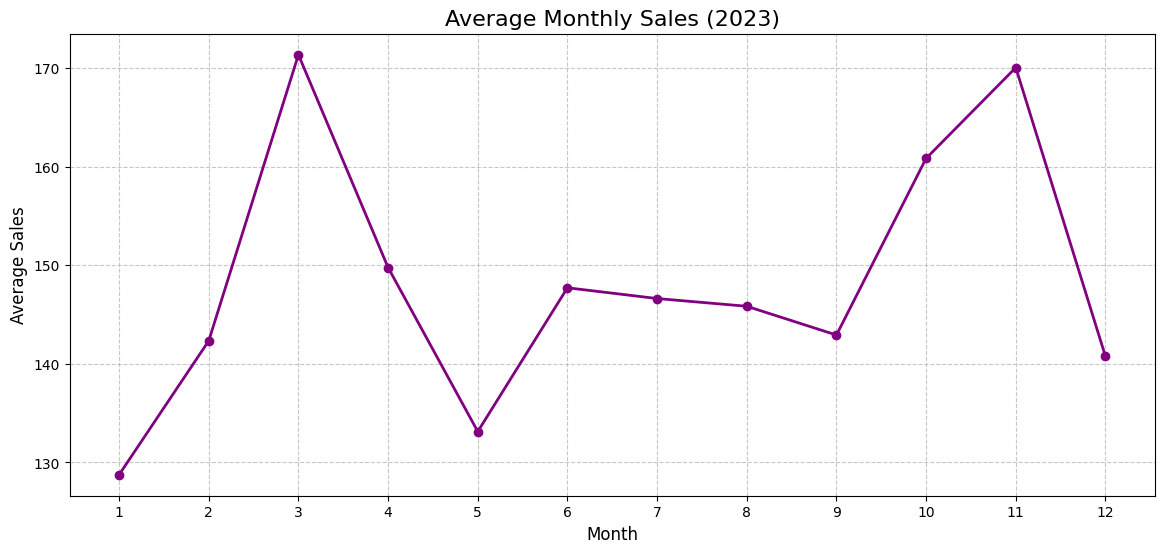

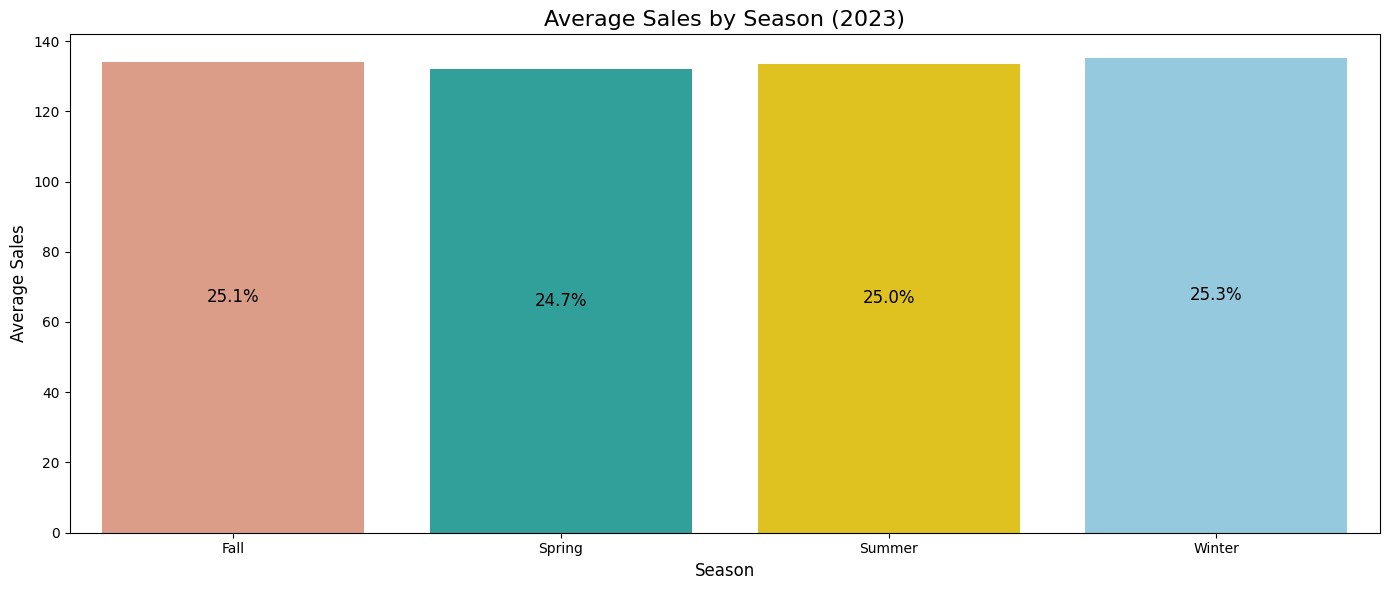

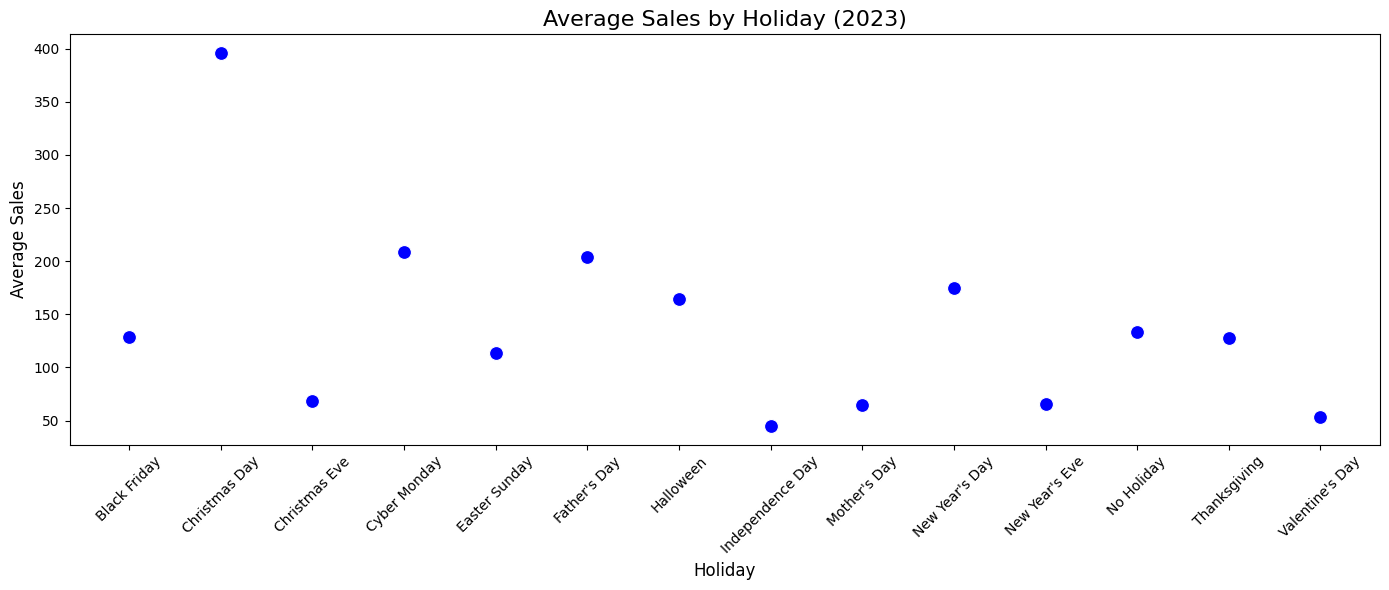

In [335]:
# Create a Line Plot from Matplotlib to display the Monthly Sales
plt.figure(figsize=(14, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Average Sales'], marker='o', color='purple', linewidth=2)
# Add Titles and Labels
plt.title('Average Monthly Sales (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(range(1, 13), fontsize=10)  # Ensure each month is displayed
plt.grid(True, linestyle='--', alpha=0.7)  # Add a grid for better readability
# Display the plot
plt.show()


# Create a Bar Plot from Seaborn to display Seasonal Sales
# First I need to calculate the total sales for the average sales
total_sales = seasonal_sales['Average Sales'].sum()

# Calculate percentages
seasonal_sales['Percentage'] = (seasonal_sales['Average Sales'] / total_sales) * 100

# Create the bar plot using Seaborn
plt.figure(figsize=(14, 6))
ax = sns.barplot(
    data=seasonal_sales,
    x='Season',
    y='Average Sales',
    hue='Season',  # Assign 'Season' to hue
    palette=['#E9967A', '#20B2AA', '#FFD700', '#87CEEB'],# Define colors for each season
    dodge=False  # Prevents bar shifting due to hue
)

# Add percentage labels inside the bars
for i, row in seasonal_sales.iterrows():
    percentage = row['Percentage']
    average_sales = row['Average Sales']
    # Add percentage text inside each bar
    ax.text(i, average_sales / 2, f'{percentage:.1f}%', ha='center', va='center', color='black', fontsize=12)

# Add Titles and Labels
plt.title('Average Sales by Season (2023)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.legend([], [], frameon=False) # Remove legend
# Update layout and display the plot
plt.tight_layout()
plt.show()


# Scatter Plot from Seaborn to display Holiday Sales (2023)
plt.figure(figsize=(14, 6))
sns.scatterplot(data=holiday_sales, x='Holiday', y='Average Sales', color='blue', s=100)
# Add Titles and Labels
plt.title('Average Sales by Holiday (2023)', fontsize=16)
plt.xlabel('Holiday', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
# Update layout and display the plot
plt.tight_layout()
plt.show()

### Notes on Findings

* The line plot shows noticeable fluctuations in sales, with a peak in March followed by a decline through May. From June to September, sales remain stable, then recover towards the end of the year, peaking again in November. These trends suggest that seasonal factors, holidays, or promotions may be driving the sales fluctuations.

* Seasonal Sales bar plot shows that the average sales for each season in 2023 are relatively consistent, with Winter (25.3%) and Fall (25.1%) slightly outperforming Spring (24.7%) and Summer (25.0%). This pattern suggests that sales are somewhat higher in the first and last quarters of the year (Winter and Fall) compared to the middle of the year (Spring and Summer), which could reflect seasonal shifts in consumer behavior

* The scatter plot shows the average sales across holidays in 2023, emphasizing the top-performing holidays. The holidays with the highest sales include Christmas, Black Friday, Cyber Monday, and New Year's Eve/Day.

### Analyze the Average sales by discounting and promotion status

In [336]:
# Create a DataFrame using groupby and agg functions to summarize the impact of discounts and promotiona status on sales within different categories
promotion_discount_impact = merged_df.groupby(
    ['Category', 'Discount Applied', 'Promo Code Used'], observed=False
).agg(
    Avg_Sales=('Sales', 'mean')
).reset_index()

# Fill NaN values in 'Avg_Sales' with the median of the column
promotion_discount_impact['Avg_Sales'] = promotion_discount_impact['Avg_Sales'].fillna(promotion_discount_impact['Avg_Sales'].median())
# Sort by Avg_Sales in descending order
promotion_discount_impact = promotion_discount_impact.sort_values(by='Avg_Sales', ascending=False)

# Display the result
promotion_discount_impact.head()

,Category,Discount Applied,Promo Code Used,Avg_Sales
7,Clothing,True,True,144.675787
11,Footwear,True,True,142.104247
15,Outerwear,True,True,139.631944
3,Accessories,True,True,136.508287
6,Clothing,True,False,132.254144


### I will Visualize the Results

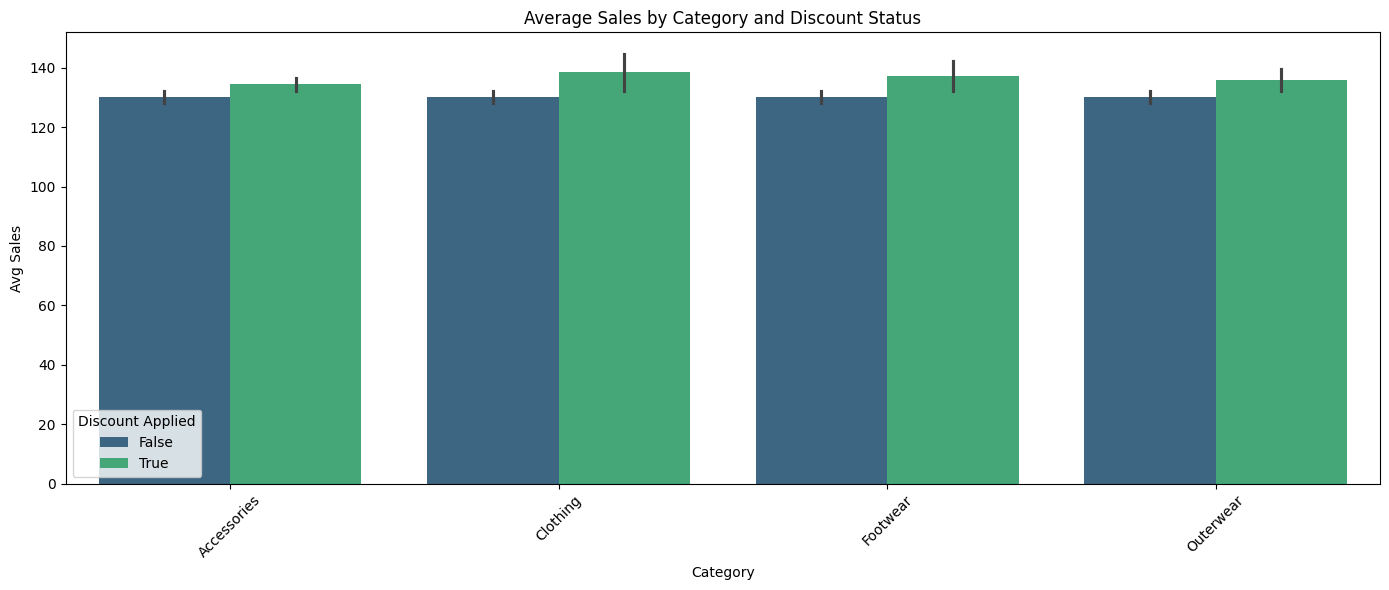

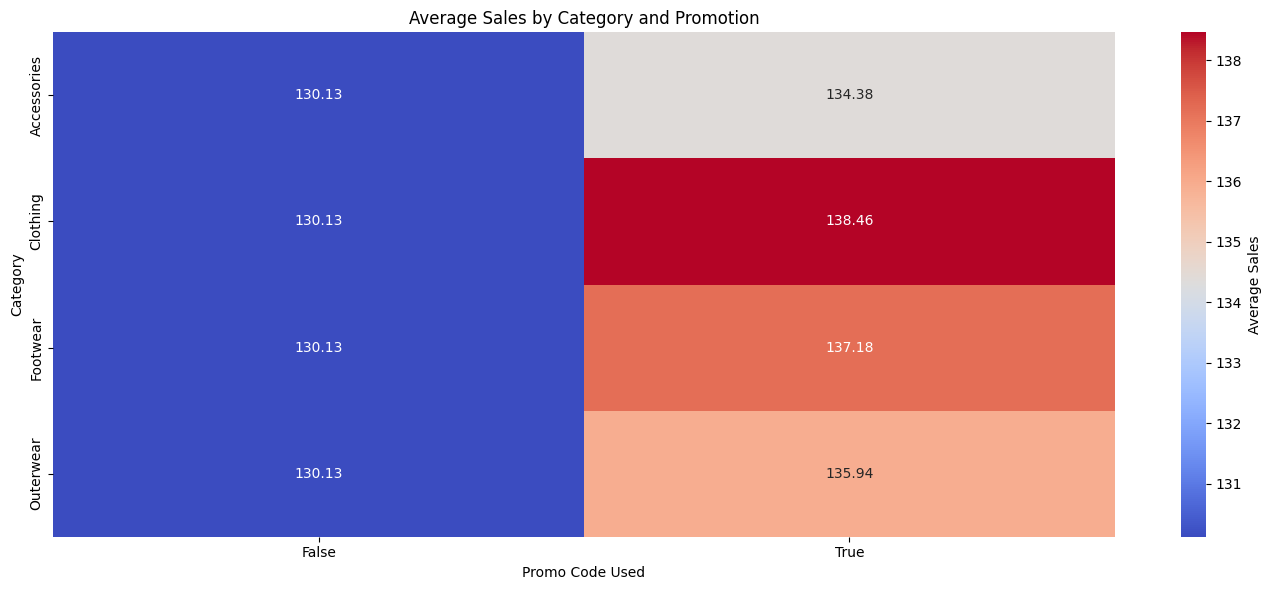

In [337]:
# Create a Bar Plot from Seaborn to show the avg sales by category and discount
plt.figure(figsize=(14, 6)) # Figure adjustments
sns.barplot(data=promotion_discount_impact, x='Category', y='Avg_Sales', hue='Discount Applied', palette='viridis')
# Add Titles and Labels
plt.title('Average Sales by Category and Discount Status') # Title
# Update labels 
plt.xlabel('Category') 
plt.ylabel('Avg Sales')
plt.legend(title='Discount Applied')
plt.xticks(rotation=45)
plt.tight_layout() # Update layout
# Display the plot
plt.show()

# Plot heatmap from Seaborn to show the Average Sales and Promotions by Category
# Create a pivot table for heatmap to provide the data in the correct format
heatmap_data = promotion_discount_impact.pivot_table(
    index='Category', columns='Promo Code Used', values='Avg_Sales', aggfunc='mean', observed=False
)
# Plot heatmap from Seaborn to show the avg sales by category and promotion
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'label': 'Average Sales'})
# Add Titles and Labels
plt.title('Average Sales by Category and Promotion')
plt.xlabel('Promo Code Used')
plt.ylabel('Category')
# Update layout and display the plot
plt.tight_layout()
plt.show()

### Notes on Findings 

* The bar plot shows that discounts generally boost average sales, especially in categories like Clothing and Footwear, where sales with discounts applied exceed those without.
Interestingly, categories like Accessories and Outerwear show a more moderate impact, suggesting lower sensitivity to discounts. Despite these variations, the overall average sales across all categories with discounts remain relatively close, highlighting a consistent benefit from discounts offers.

* The heatmap reveals that the Clothing and Footwear categories achieve the highest average sales under promotional conditions, with values around 138.46 and 137.18, respectively. While Accessories and Outerwear have lower average sales, their performance remains relatively close to the top-performing categories, suggesting that promotions create a narrowing gap across all categories in terms of sales impact

### Analyze Customer Previous Purchases, Frequency of Purchases, Review Rating and Subscription Status

Calculate the average Sales by Customer Frequency of Purchases, Previous Purchases, Subscription Status and Review Rating

In [338]:
# Aggregate sales by frequency of purchases
# Calculate the Average sales by frequency of purchases
frequency_sales = merged_df.groupby('Frequency of Purchases')['Sales'].mean().reset_index()
# Sort the data by frequency of purchases
frequency_sales = frequency_sales.sort_values(by='Frequency of Purchases')

# Define ranges (bins)  for grouping previous purchases and assign corresponding labels
bins = [0, 10, 20, 30, 40, 50, merged_df['Previous Purchases'].max() + 1]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '50+']  # Adjusted labels
# Create previous purchases group column
merged_df['Previous Purchases Group'] = pd.cut(merged_df['Previous Purchases'], bins=bins, labels=labels, right=False)
# Calculate the average sales by previous purchases group
previous_purchases_sales = merged_df.groupby('Previous Purchases Group', observed=False)['Sales'].mean().reset_index()

# Group sales by review rating
# Calculate the average sales by review rating
review_sales = merged_df.groupby('Review Rating')['Sales'].mean().reset_index()
# Sort the data by Review Rating
review_sales = review_sales.sort_values(by='Review Rating')

# Compare average sales for subscribed vs. non-subscribed customers
# Calculate the Average sales by subscription status
subscription_sales = merged_df.groupby('Subscription Status')['Sales'].mean().reset_index()
# Aggregate sales data by subscription status
subscription_sales_aggregated = subscription_sales.groupby('Subscription Status')['Sales'].mean()

### I will Visualize the Results

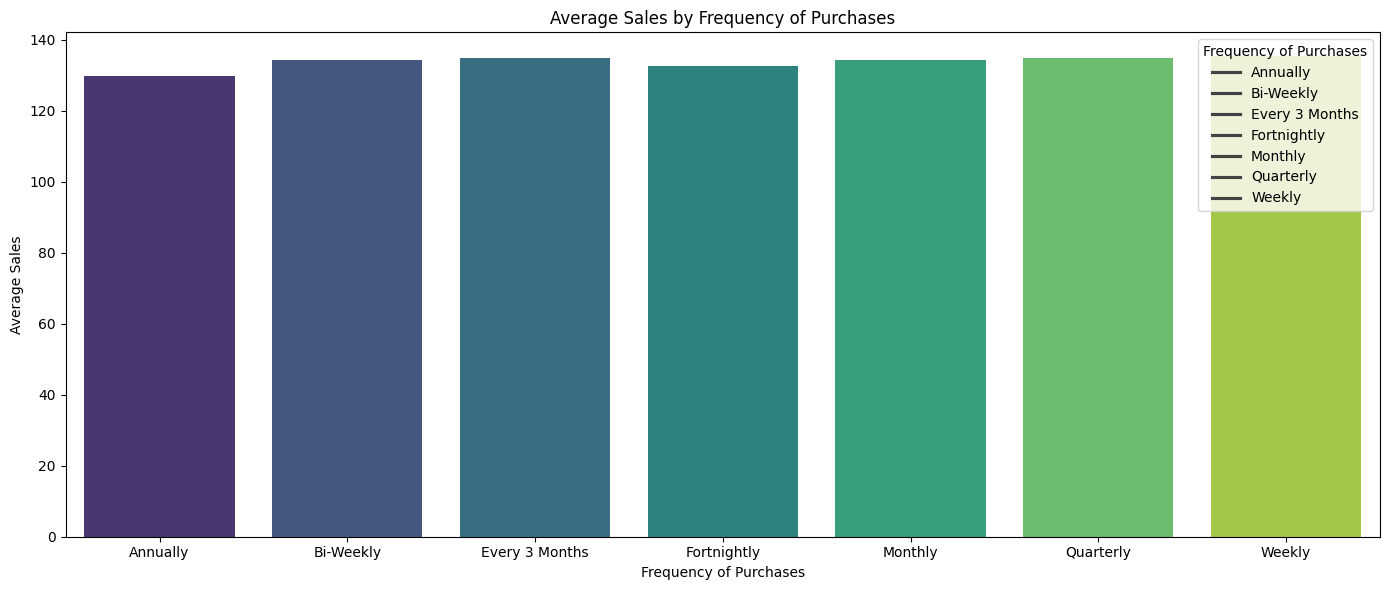

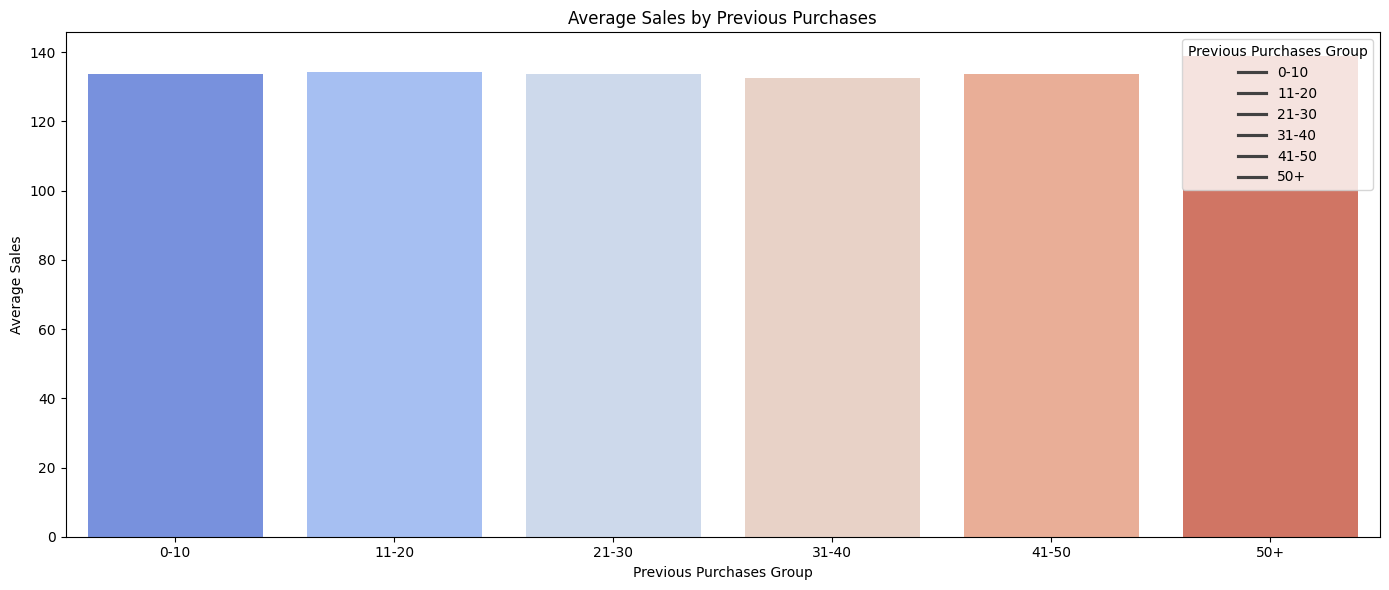

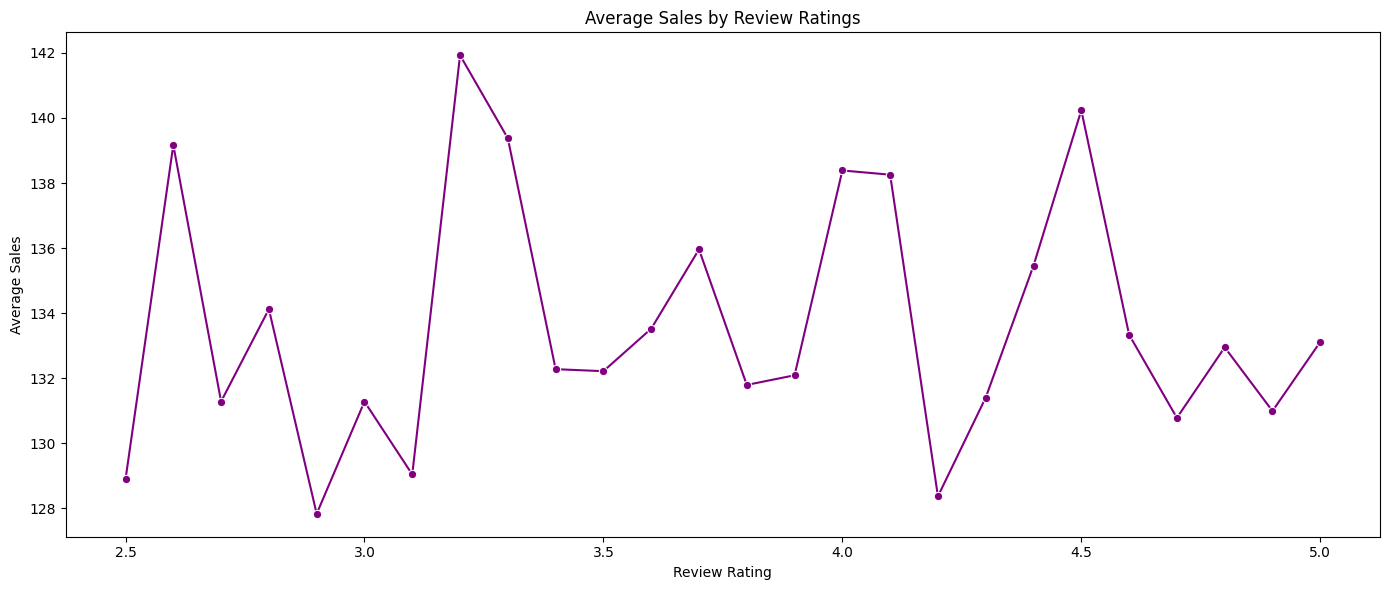

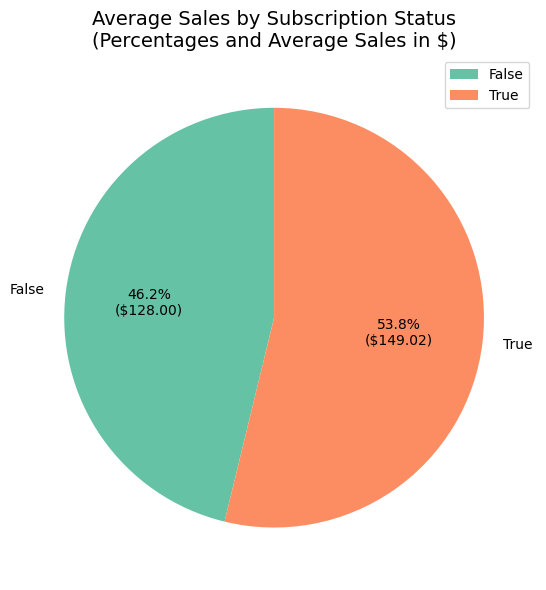

In [339]:
# Create a Bar Plot from Seaborn to display the average sales by frequency of purchases
plt.figure(figsize=(14, 6))
sns.barplot(
    data=frequency_sales, 
    x='Frequency of Purchases', 
    y='Sales', 
    hue='Frequency of Purchases', 
    palette='viridis', 
    dodge=False
)
# set the legend labels
legend_labels = frequency_sales['Frequency of Purchases'].unique()
plt.legend(legend_labels, title='Frequency of Purchases')
plt.title('Average Sales by Frequency of Purchases')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Average Sales')
# Update the layout and display the plot
plt.tight_layout()
plt.show()

# Create a Bar Plot from Seaborn to display the average sales by previous purchases group
plt.figure(figsize=(14, 6))
sns.barplot(
    data=previous_purchases_sales, 
    x='Previous Purchases Group', 
    y='Sales', 
    hue='Previous Purchases Group',  # Assign `hue` to match colors with categories
    palette='coolwarm', 
    dodge=False
)
# set legend labels
unique_groups = previous_purchases_sales['Previous Purchases Group'].unique()
plt.legend(unique_groups, title='Previous Purchases Group', loc='upper right')
plt.title('Average Sales by Previous Purchases')
plt.xlabel('Previous Purchases Group')
plt.ylabel('Average Sales')
# Update the layout and display the plot
plt.tight_layout()
plt.show()

# Create a Line Plot from Seaborn to show the average sales by review ratings 
plt.figure(figsize=(14, 6))
sns.lineplot(data=review_sales, x='Review Rating', y='Sales', marker='o', color='purple')
# Add Titles and Labels
plt.title('Average Sales by Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Average Sales')
# Update the layout and display the plot
plt.tight_layout()
plt.show()

# Create a pie plot to compare average sales for subscribed vs. non-subscribed customers
# Custom autopct function to display percentage and average sales
def autopct_format(pct, all_values):
    total = sum(all_values)
    value = pct * total / 100
    return f"{pct:.1f}%\n(${value:.2f})"  # Shows percentage and average sales
# Create the pie plot
plt.figure(figsize=(14, 6))
# Colors for the pie chart
colors = sns.color_palette('Set2', len(subscription_sales_aggregated))
# Create the pie plot
subscription_sales_aggregated.plot.pie(
    autopct=lambda pct: autopct_format(pct, subscription_sales_aggregated.values), 
    startangle=90, 
    colors=colors, 
    legend=True, 
    labels=subscription_sales_aggregated.index
)
# Add title
plt.title('Average Sales by Subscription Status\n(Percentages and Average Sales in $)', fontsize=14)

# Hide y-axis label
plt.ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

### Notes on Findings

* Purchase Frequency bar plot shows that customers who purchase more frequently generate higher average sales compared to occasional buyers, emphasizing the importance of encouraging repeat purchases.
* Previous Purchases bar plot shows that loyal customers with a history of more purchases contribute significantly to sales, suggesting that retaining repeat customers should be a focus for marketing efforts.
* Review Ratings line plot shows that higher review ratings are associated with increased average sales, indicating that well-rated products are more likely to perform well and should be prioritized in marketing.
* Subscription Status pie plot shows that Subscribed customers consistently drive higher sales, suggesting the value of subscription models and the need to target non-subscribers with incentives to subscribe.

### Recommendations

1. Optimize Inventory:
* Stock high-demand products during peak seasons (e.g., Christmas, New Year's Day).
* Pair less popular items with best-sellers to improve visibility and sales.

2. Targeted Marketing:
* Create tailored ads for young adults and seniors, focusing on their preferences.
* Run holiday-themed promotions to drive seasonal sales.

3. Strategic Discounts:
* Offer discounts on popular categories like clothing and footwear, while keeping an eye on profit margins.
* Encourage repeat purchases with loyalty programs or rewards.

4. Promote Subscriptions:
* Highlight perks like free shipping and exclusive offers to attract subscribers.
* Offer limited-time free trials to increase engagement.

5. Leverage Reviews:
* Showcase highly-rated products in ads and on product pages.
* Use positive customer testimonials to build trust and encourage purchases.

6. Data-Driven Strategies:
* Analyze past sales data to adjust inventory and marketing plans.
* Continuously test and refine campaigns based on customer feedback.

#### 